# Selenium

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver

These settings allow us to use Selenium in notebooks

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

# nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

#pandas and matplotlib

In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline

# Scraping data

Titles for articles regarding Amazon are being scraped 

In [5]:
driver.get("https://finviz.com/quote.ashx?t=INTC")

In [6]:
article_list = []
date_list = []
time_list =[]
ticker = 'INTC'
ticker_list =[]

Scraping title, date and time

In [7]:
for i in range(1, 101): 
  ticker_list.append('INTC')
  article_path = f"""//*[@id="news-table"]/tbody/tr[{i}]/td[2]/div/div[1]/a"""
  article = driver.find_element_by_xpath(article_path)
  article_list.append(article.text)

  date_path = f"""//*[@id="news-table"]/tbody/tr[{i}]/td[1]"""
  date_data = driver.find_element_by_xpath(date_path)
  td_data = date_data.text.split()

  if len(td_data) == 1:
    time = td_data[0]
    time_list.append(time)
    date_list.append('')
  else:
    time = td_data[1]
    date = td_data[0]
    date_list.append(date)
    time_list.append(time)


# Working with pandas & plotting

In [8]:
allinfo = list(zip(ticker_list, date_list, time_list, article_list))
df = pd.DataFrame(allinfo, columns = ["Ticker", "Date","Time", "Article"])

In [9]:
f = lambda title: vader.polarity_scores(title)["compound"]
df["compound"] = df["Article"].apply(f)
df["Date"] = pd.to_datetime(df.Date).dt.date

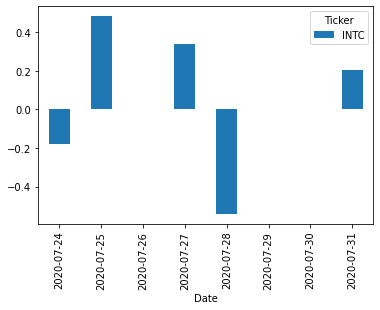

<Figure size 720x576 with 0 Axes>

Ticker        INTC
Date              
2020-07-24 -0.1779
2020-07-25  0.4824
2020-07-26  0.0000
2020-07-27  0.3400
2020-07-28 -0.5423
2020-07-29  0.0000
2020-07-30  0.0000
2020-07-31  0.2023


In [10]:
mean_df =df.groupby(["Ticker","Date"]).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs("compound", axis = "columns").transpose()
mean_df.plot(kind='bar')
plt.figure(figsize=(10,8))
plt.show();
print(mean_df)